In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rice-type-classification/riceClassification.csv


# Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# Read Data

In [3]:
data=pd.read_csv('/kaggle/input/rice-type-classification/riceClassification.csv')

# show 5 frist data

In [4]:
data.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


# Show data columns

In [5]:
x=1
for col in data.columns:
    print(f'column {x} is :',col)
    x+=1

column 1 is : id
column 2 is : Area
column 3 is : MajorAxisLength
column 4 is : MinorAxisLength
column 5 is : Eccentricity
column 6 is : ConvexArea
column 7 is : EquivDiameter
column 8 is : Extent
column 9 is : Perimeter
column 10 is : Roundness
column 11 is : AspectRation
column 12 is : Class


# show data describe

In [6]:
data.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


# Show data corr

In [7]:
data.corr()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
id,1.000000,0.709155,0.464022,0.637148,-0.347816,0.707600,0.706333,0.149924,0.628830,0.430033,-0.382648,-0.808591
Area,0.709155,1.000000,0.599939,0.930215,-0.550073,0.999362,0.998158,0.230541,0.881540,0.620490,-0.623979,-0.816589
MajorAxisLength,0.464022,0.599939,1.000000,0.273211,0.295717,0.602061,0.618002,-0.073549,0.870178,-0.202566,0.240471,-0.147741
MinorAxisLength,0.637148,0.930215,0.273211,1.000000,-0.808640,0.928992,0.923790,0.308541,0.674249,0.834398,-0.860516,-0.917766
Eccentricity,-0.347816,-0.550073,0.295717,-0.808640,1.000000,-0.547896,-0.534688,-0.329954,-0.165915,-0.903657,0.950301,0.788636
ConvexArea,0.707600,0.999362,0.602061,0.928992,-0.547896,1.000000,0.997403,0.227359,0.886987,0.610236,-0.621472,-0.814214
EquivDiameter,0.706333,0.998158,0.618002,0.923790,-0.534688,0.997403,1.000000,0.225944,0.891567,0.607432,-0.609957,-0.809361
Extent,0.149924,0.230541,-0.073549,0.308541,-0.329954,0.227359,0.225944,1.000000,0.073227,0.366793,-0.350875,-0.303440
Perimeter,0.628830,0.881540,0.870178,0.674249,-0.165915,0.886987,0.891567,0.073227,1.000000,0.186063,-0.227256,-0.533274
Roundness,0.430033,0.620490,-0.202566,0.834398,-0.903657,0.610236,0.607432,0.366793,0.186063,1.000000,-0.947875,-0.831759


# Display data corr

<AxesSubplot:>

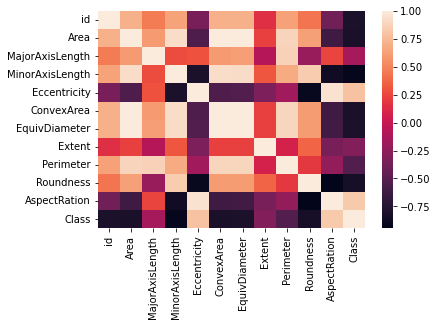

In [8]:
sns.heatmap(data.corr())

# Show data info

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


# Show data contain null data

In [10]:
data.isnull().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

# Show data contain duplicate data

In [11]:
data.duplicated().sum()

0

# Show input X and oytput y

In [12]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X[:10],y[:10]

(   id  Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
 0   1  4537        92.229316        64.012769      0.719916        4677   
 1   2  2872        74.691881        51.400454      0.725553        3015   
 2   3  3048        76.293164        52.043491      0.731211        3132   
 3   4  3073        77.033628        51.928487      0.738639        3157   
 4   5  3693        85.124785        56.374021      0.749282        3802   
 5   6  2990        77.417073        50.954344      0.752861        3080   
 6   7  3556        84.323564        55.413061      0.753762        3636   
 7   8  3788        86.952411        56.444769      0.760664        3866   
 8   9  2629        74.133114        48.074144      0.761228        2790   
 9  10  5719       106.721142        68.977700      0.763053        5819   
 
    EquivDiameter    Extent  Perimeter  Roundness  AspectRation  
 0      76.004525  0.657536    273.085   0.764510      1.440796  
 1      60.471018  0.713009   

# MinMaxScaler for Data

In [13]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(X)

# showing data

In [14]:
print('X \n' , X[:10])
print('y \n' , y[:10])

X 
 [[0.00000000e+00 2.62096774e-01 1.65901000e-01 6.14921912e-01
  1.49138919e-01 2.48902598e-01 3.37190938e-01 5.44960448e-01
  2.44208593e-01 8.07933800e-01 3.23714166e-02]
 [5.49934008e-05 4.55254943e-02 5.12261894e-03 3.52934232e-01
  1.68566717e-01 5.17261834e-02 6.63359399e-02 6.55171000e-01
  3.62829699e-02 8.99898243e-01 3.72039683e-02]
 [1.09986802e-04 6.84183143e-02 1.98027413e-02 3.66291629e-01
  1.88069170e-01 6.56068336e-02 9.81637824e-02 7.46848193e-01
  4.17244523e-02 9.50264555e-01 4.22215853e-02]
 [1.64980202e-04 7.16701353e-02 2.65911106e-02 3.63902713e-01
  2.13670983e-01 6.85727844e-02 1.02609451e-01 7.95276556e-01
  4.37951049e-02 9.52688061e-01 4.90766520e-02]
 [2.19973603e-04 1.52315297e-01 1.00768608e-01 4.56246995e-01
  2.50354568e-01 1.45094317e-01 2.07585535e-01 7.67156431e-01
  1.06958035e-01 9.58906116e-01 5.94709892e-02]
 [2.74967004e-04 6.08740895e-02 3.01064352e-02 3.43667462e-01
  2.62691629e-01 5.94376557e-02 8.77790853e-02 4.00646792e-01
  6.39334052

# Splitting data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (12183, 11)
X_test shape is  (6002, 11)
y_train shape is  (12183,)
y_test shape is  (6002,)


# Applying LogisticRegression Model 

In [16]:
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
LogisticRegressionModel.fit(X_train, y_train)

LogisticRegression(random_state=33, solver='sag')

# Calculating Details

In [17]:
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)

LogisticRegressionModel Train Score is :  0.9998358368218009
LogisticRegressionModel Test Score is :  1.0
LogisticRegressionModel Classes are :  [0 1]
LogisticRegressionModel No. of iteratios is :  [27]


# Calculating Prediction

In [18]:
y_pred = LogisticRegressionModel.predict(X_test)
y_pred_prob = LogisticRegressionModel.predict_proba(X_test)
print('Predicted Value for LogisticRegressionModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for LogisticRegressionModel is : ' , y_pred_prob[:10])

Predicted Value for LogisticRegressionModel is :  [1 0 0 1 1 1 1 0 1 0]
Prediction Probabilities Value for LogisticRegressionModel is :  [[3.38500692e-03 9.96614993e-01]
 [9.92519405e-01 7.48059550e-03]
 [9.99467779e-01 5.32221376e-04]
 [1.19673135e-03 9.98803269e-01]
 [2.31601226e-03 9.97683988e-01]
 [7.29539494e-03 9.92704605e-01]
 [7.84898886e-03 9.92151011e-01]
 [9.96752383e-01 3.24761679e-03]
 [1.23182486e-03 9.98768175e-01]
 [9.99353573e-01 6.46427035e-04]]


# Calculating Confusion Matrix

Confusion Matrix is : 
 [[2738    0]
 [   0 3264]]


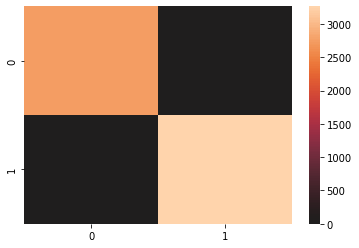

In [19]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)
# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

# Calculating Confusion Matrix

Confusion Matrix is : 
 [[5462    0]
 [   2 6719]]


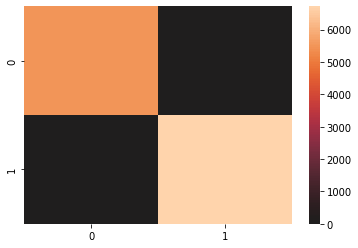

In [20]:
CM = confusion_matrix(y_train,LogisticRegressionModel.predict(X_train))
print('Confusion Matrix is : \n', CM)
# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

# Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))

In [21]:
AccScore = accuracy_score(y_test, y_pred, normalize=True)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  1.0


# Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)

In [22]:
F1Score = f1_score(y_test, y_pred, average='micro')
print('F1 Score is : ', F1Score)

F1 Score is :  1.0


# Calculating Recall Score : (Sensitivity) (TP / float(TP + FN))   1 / 1+2  

In [23]:
RecallScore = recall_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Recall Score is : ', RecallScore)

Recall Score is :  1.0


# Calculating Precision Score : (Specificity) #(TP / float(TP + FP))  

In [24]:
PrecisionScore = precision_score(y_test, y_pred, average='micro')
print('Precision Score is : ', PrecisionScore)

Precision Score is :  1.0


# Calculating Precision recall Curve : 

In [25]:
PrecisionValue, RecallValue, ThresholdsValue = precision_recall_curve(y_test,y_pred)
print('Precision Value is : ', PrecisionValue)
print('Recall Value is : ', RecallValue)
print('Thresholds Value is : ', ThresholdsValue)

Precision Value is :  [1. 1.]
Recall Value is :  [1. 0.]
Thresholds Value is :  [1]


# Calculating classification Report :  

In [26]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2738
           1       1.00      1.00      1.00      3264

    accuracy                           1.00      6002
   macro avg       1.00      1.00      1.00      6002
weighted avg       1.00      1.00      1.00      6002



# Calculating ROC AUC Score: 

In [27]:
ROCAUCScore = roc_auc_score(y_test,y_pred, average='micro') #it can be : macro,weighted,samples
print('ROCAUC Score : ', ROCAUCScore)

ROCAUC Score :  1.0


In [28]:
submision=pd.DataFrame(y_pred,columns=['prediction'])
submision.to_csv('/kaggle/working/prediction.csv')
submision

,prediction
0,1
1,0
2,0
3,1
4,1
...,...
5997,0
5998,0
5999,1
6000,1
